

### О задании
На сайтах для поиска работы можно найти сотни тысяч объявлений, каждое из которых состоит из пространного описания вакансии и предлагаемой зарплаты. Есть ли связь между описанием и зарплатой? Существуют ли определенные слова, которые наиболее сильно характеризуют зарплату? Можно ли найти другие информативные факторы? Вам предстоит ответить на эти вопросы, проанализировав выборку объявлений о работе в Великобритании.

Практическое задание 2 посвящено работе с текстовыми данными и категориальными признаками и задачам бинарной классификации. Вы научитесь:
 * работать с категориальными признаками;
 * строить вещественные представления текстовых данных;
 * обучать и строить прогнозы линейных классификаторов при помощи scikit-learn и Vowpal Wabbit;
 * тестировать модели и проводить оценку качества в задачах бинарной классификации.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Данные

Как было упомянуто ранее, в рамках данного задания мы будем решать задачу бинарной классификации для предсказания уровня заработной платы по тексту объявления о вакансии на примере набора данных с соревнования [Adzuna - Job Salary Prediction](https://www.kaggle.com/c/job-salary-prediction). Для начала пройдите по [ссылке](https://www.kaggle.com/c/job-salary-prediction/data) и скачайте файл Train_rev1 (при необходимости, зарегистрируйтесь на Kaggle).

Посмотрим на данные в файле и загрузим их в DataFrame:

In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# print first 2 rows from Train_rev1.csv
!head -n 2 Train_rev1.csv

In [3]:
df = pd.read_csv('Train_rev1.csv', sep=',', low_memory=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 12 columns):
Id                    244768 non-null int64
Title                 244767 non-null object
FullDescription       244768 non-null object
LocationRaw           244768 non-null object
LocationNormalized    244768 non-null object
ContractType          65442 non-null object
ContractTime          180863 non-null object
Company               212338 non-null object
Category              244768 non-null object
SalaryRaw             244768 non-null object
SalaryNormalized      244768 non-null int64
SourceName            244767 non-null object
dtypes: int64(2), object(10)
memory usage: 22.4+ MB


In [4]:
df = df.iloc[0:1000]
df.head(5)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Id                    1000 non-null int64
Title                 1000 non-null object
FullDescription       1000 non-null object
LocationRaw           1000 non-null object
LocationNormalized    1000 non-null object
ContractType          685 non-null object
ContractTime          110 non-null object
Company               173 non-null object
Category              1000 non-null object
SalaryRaw             1000 non-null object
SalaryNormalized      1000 non-null int64
SourceName            1000 non-null object
dtypes: int64(2), object(10)
memory usage: 93.8+ KB


В оригинальной постановке предлагается рассматривать признак SalaryNormalized как целевой и решать задачу регрессии, однако в рамках данного задания мы сведём её к задаче бинарной классификации, разделив объекты на 2 группы: объявления о вакансиях с низкой и высокой зарплатами соответственно.

<img src = "https://panteon.fun/files/mean_median2.gif">

В качестве порога разбиения объектов на группы будем рассматривать медиану признака SalaryNormalized. Заметим, что таким образом мы автоматически получим задачу классификации со сбалансированными классами:

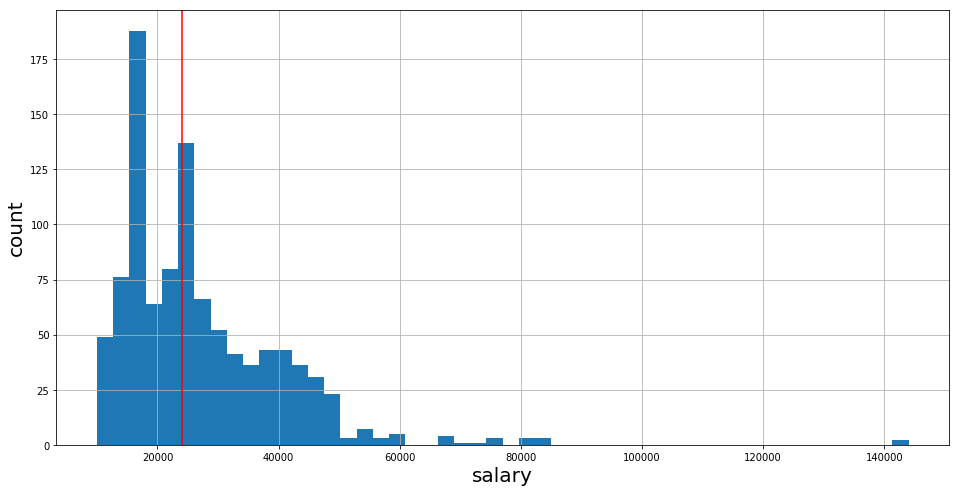

In [6]:
# salary histogramm
median = np.median(df['SalaryNormalized'])
figsize(16,8)
plt.hist(df['SalaryNormalized'], bins=50)
plt.axvline(median, c='r')
plt.xlabel('salary', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.grid()

Осуществим последние шаги по подготовке датасета:
- бинаризуем признак SalaryNomalized по описанному ранее порогу;
- исключим из выборки признак SalaryRaw, чтобы устранить утечку целевой переменной в признаки.

In [7]:
df['SalaryNormalized'] = (df['SalaryNormalized'] > median).astype(int)
df.drop('SalaryRaw', axis=1, inplace=True)
df.head(5)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk


#### 1. (0 баллов) Разбейте получившуюся выборку на обучающую и контрольную в соотношении 70/30 с использованием перемешивания объектов.

При разбиении используйте значение параметра random_state=42.

In [8]:
from sklearn.model_selection import train_test_split

#потом, сначала полностью подготовим df
#df_train, df_test = train_test_split(df, random_state = 42, train_size = .7)

## Векторизация

Как правило, модели, используемые в машинном обучении, применяются в предположении, что матрица "объект-признак" является вещественнозначной. Поэтому при работе с категориальными признаками и текстами сперва их необходимо привести к вещественному виду.

Заметим, что в нашей задаче есть признаки, являющиеся текстами произвольной природы (Title, FullDescription), и категориальные признаки, принимающие ограниченное число значений (ContractType, Category и др.).

Самый простой и понятный способ преобразования текстовых данных — векторизация. В этом случае для каждого слова, встречающегося в некотором набре текстов мы создаём отдельный новый признак, который будет равен $1$, когда слово встречается в заданном объекте, и $0$ – в противном случае.

#### 2. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения всех признаков каждого объекта выборки через символы пробела. После этого получите признаковое описание объектов, осуществив векторизацию получившихся текстов при помощи [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html), обучив его на обучающей выборке и применив на контрольной.

In [9]:
#fast spaghetti
df['string_concat'] = df['Title'].str.cat(df['FullDescription'], sep =" ", na_rep = "").str.cat(df['LocationRaw'], sep =" ", na_rep = "").str.cat(df['LocationNormalized'], sep =" ", na_rep = "").str.cat(df['ContractType'], sep =" ", na_rep = "").str.cat(df['ContractTime'], sep =" ", na_rep = "").str.cat(df['Company'], sep =" ", na_rep = "").str.cat(df['Category'], sep =" ", na_rep = "")
#slow
#df['string_concat'] = df[df.columns[1:9]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis = 1)

In [10]:
#df.drop(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized', 'ContractType', 'ContractTime', 'Company', 'Category', 'SourceName'], axis=1, inplace=True)

In [11]:
#df["string_concat"] = df["string_concat"].str.lower()
df.head(5)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,SourceName,string_concat
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk,Engineering Systems Analyst Engineering System...
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk,Stress Engineer Glasgow Stress Engineer Glasgo...
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk,Modelling and simulation analyst Mathematical ...
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk,Engineering Systems Analyst / Mathematical Mod...
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk,"Pioneer, Miser Engineering Systems Analyst Pio..."


In [12]:
df_train, df_test = train_test_split(df, random_state = 42, train_size = .7)
print(df_train.shape)
print(df_test.shape)

(700, 12)
(300, 12)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word')

#training vectors
vectors_train = vectorizer.fit_transform(df_train['string_concat'])

In [14]:
print(vectors_train.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
vector = vectorizer.transform(['Business Development Executive  ****k plus bonus Business Development Executive'])

In [16]:
print(vector.toarray())

[[0 0 0 ... 0 0 0]]


In [17]:
print(len(vector.toarray()[0]))

5767


In [18]:
print(np.sum(vector.toarray()[0]))

8


In [19]:
print(vectorizer.inverse_transform(vector.toarray()[0]))

[array(['bonus', 'business', 'development', 'executive', 'plus'],
      dtype='<U58')]


In [20]:
#test vectors
vectors_test = vectorizer.transform(df_test['string_concat'])

In [21]:
print(vectors_test.shape)

(300, 5767)


#### 3. (1.5 балла) Обучите следующие модели на обучающей выборке:
 - [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из модуля sklearn с параметрами по умолчанию;
 - логистическую регрессию при помощи Vowpal Wabbit с параметрами по умолчанию.

In [22]:
from sklearn.linear_model import LogisticRegression  

logreg_clf = LogisticRegression(max_iter=1000000)

#training
logreg_clf.fit(vectors_train, df_train['SalaryNormalized'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
#predict
predict = logreg_clf.predict(vectors_test)

In [24]:
from sklearn import metrics

In [25]:
print(metrics.confusion_matrix(predict, df_test['SalaryNormalized']))

[[121  14]
 [ 28 137]]


In [26]:
print(metrics.classification_report(predict, df_test['SalaryNormalized']))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       135
           1       0.91      0.83      0.87       165

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [27]:
#def0 = vw1; def1 = vw-1
vw_df_train = df_train.copy()
vw_df_train.loc[vw_df_train.SalaryNormalized == 1, 'SalaryNormalized'] = -1
vw_df_train.loc[vw_df_train.SalaryNormalized == 0, 'SalaryNormalized'] = 1

vw_df_test = df_test.copy()
vw_df_test.loc[vw_df_test.SalaryNormalized == 1, 'SalaryNormalized'] = -1
vw_df_test.loc[vw_df_test.SalaryNormalized == 0, 'SalaryNormalized'] = 1

In [28]:
#!pip install vowpalwabbit

from vowpalwabbit.sklearn_vw import VWClassifier

# build model
vw_clf = VWClassifier()
vw_clf.fit(vectors_train, vw_df_train['SalaryNormalized'])

# predict model
predict_vw = vw_clf.predict(vectors_test)

/root/1cloud/1cloud/lib/python3.5/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/root/1cloud/1cloud/lib/python3.5/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.svmlight_format module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [29]:
# evaluate model
vw_clf.score(vectors_train, vw_df_train['SalaryNormalized'])

0.9557142857142857

In [30]:
vw_clf.score(vectors_test, vw_df_test['SalaryNormalized'])

0.8466666666666667

In [31]:
print(metrics.confusion_matrix(predict_vw, vw_df_test['SalaryNormalized']))

[[143  38]
 [  8 111]]


In [32]:
print(metrics.classification_report(predict_vw, vw_df_test['SalaryNormalized']))

              precision    recall  f1-score   support

        -1.0       0.95      0.79      0.86       181
         1.0       0.74      0.93      0.83       119

    accuracy                           0.85       300
   macro avg       0.85      0.86      0.84       300
weighted avg       0.87      0.85      0.85       300



#### 4. (0.5 балла) Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для каждой из построенных в п. 3 моделей на контрольной выборке. Сравните построенные модели по качеству их работы.

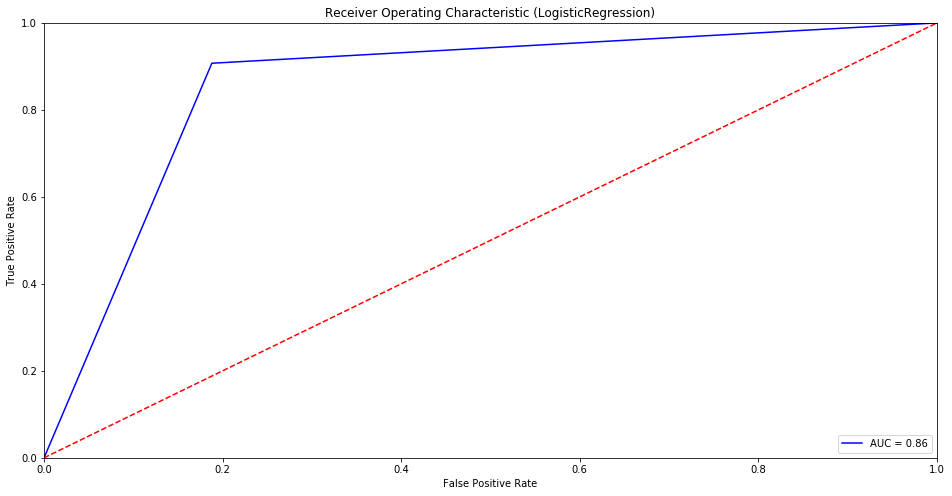

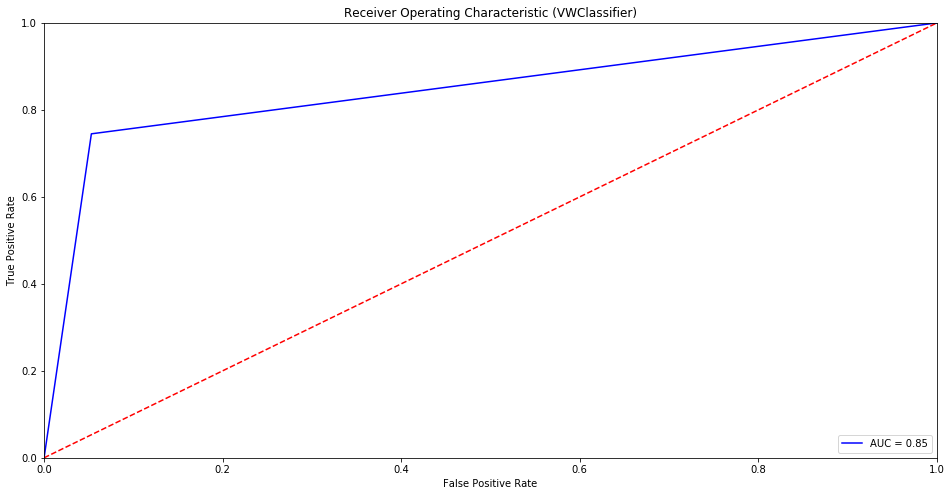

In [33]:
#calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(df_test['SalaryNormalized'], predict)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (LogisticRegression)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(vw_df_test['SalaryNormalized'], predict_vw)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (VWClassifier)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

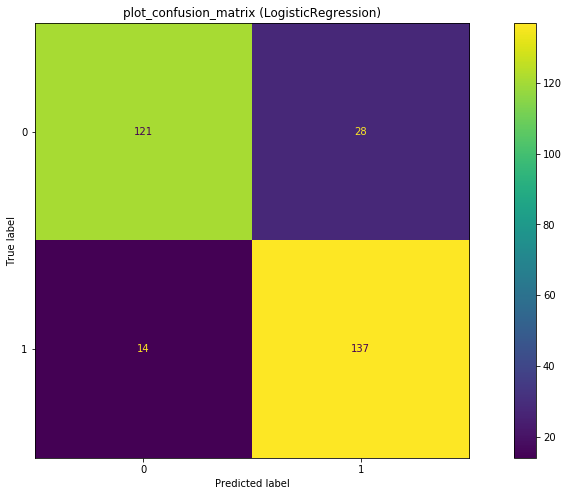

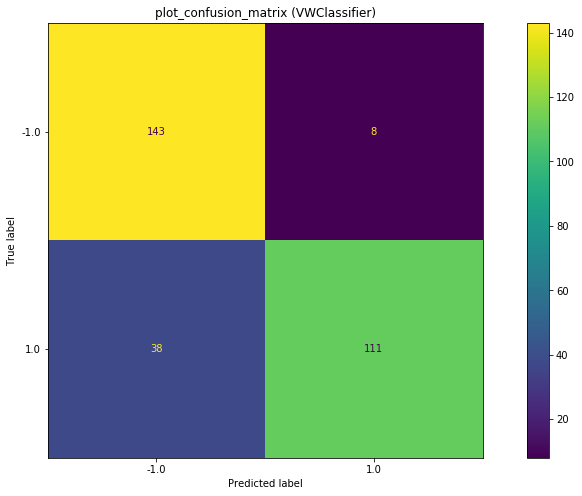

In [34]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg_clf, vectors_test, df_test['SalaryNormalized'], values_format = "d")
plt.title('plot_confusion_matrix (LogisticRegression)')
plt.show()

plot_confusion_matrix(vw_clf, vectors_test, vw_df_test['SalaryNormalized'], values_format = "d")
plt.title('plot_confusion_matrix (VWClassifier)')
plt.show()

####  5. (1 балл) Отсортируйте веса признаков для модели логистической регрессии из scikit-learn, полученной в п. 2. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретируйте полученный результат.

In [35]:
sum_words = vectors_train.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [36]:
#most
print(words_freq[:10])

[('and', 6028), ('the', 4990), ('to', 4591), ('of', 3199), ('in', 2953), ('for', 2400), ('care', 2234), ('with', 1855), ('you', 1673), ('is', 1651)]


In [37]:
#less
print(words_freq[-10:])

[('matrix', 1), ('00am', 1), ('chislehurst', 1), ('princess', 1), ('nationality', 1), ('gymnstics', 1), ('stuides', 1), ('rmc', 1), ('practicing', 1), ('directorate', 1)]


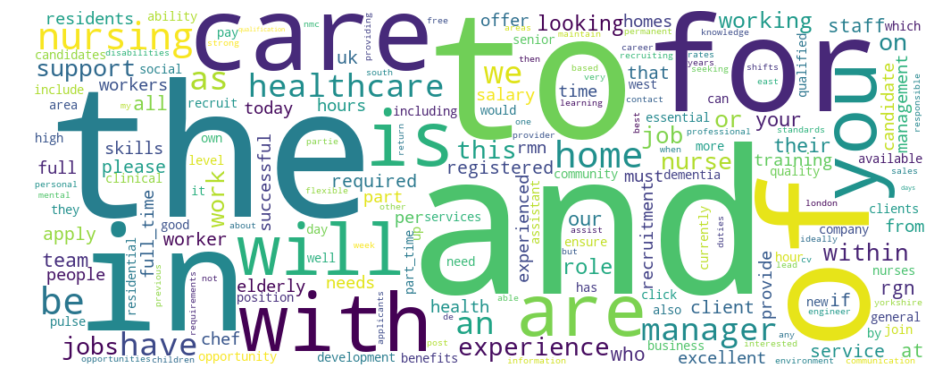

In [38]:
from wordcloud import WordCloud

words_freq_dict = dict([(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()])
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(words_freq_dict)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

#### 6. (0.5 доп. балла) Отсортируйте веса признаков для модели логистической регрессии, полученной в п. 2 при помощи Vowpal Wabbit. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретирйте полученный результат.

In [39]:
# Your code here

## TF-IDF

Ещё один способ работы с текстовыми данными — [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf) (**T**erm **F**requency–**I**nverse **D**ocument **F**requency). Рассмотрим коллекцию текстов $D$.  Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

1. Term Frequency – количество вхождений слова в отношении к общему числу слов в тексте:
$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$
где $n_{td}$ — количество вхождений слова $t$ в текст $d$.
1. Inverse Document Frequency
$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$
где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину:
$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$

Признаковым описанием одного объекта $d \in D$ будет вектор $\bigg(\text{tf-idf}(t,d, D)\bigg)_{t\in V}$, где $V$ – словарь всех слов, встречающихся в коллекции $D$.

#### 7. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения всех признаков каждого объекта выборки через символы пробела. После этого получите признаковое описание объектов, вычислив вектор tf-idf для каждого объекта помощи [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), обучив его на обучающей выборке и применив на контрольной.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(analyzer='word')

#training vectors
vectors_tfidf_train = vectorizer_tfidf.fit_transform(df_train['string_concat'])

In [41]:
print(vectors_tfidf_train.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.13445434 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [42]:
vector = vectorizer_tfidf.transform(['Business Development Executive  ****k plus bonus Business Development Executive'])

In [43]:
print(vector.toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [44]:
print(len(vector.toarray()[0]))

5767


In [45]:
print(np.sum(vector.toarray()[0]))

2.054879684229274


In [46]:
print(vectorizer_tfidf.inverse_transform(vector.toarray()[0]))

[array(['bonus', 'business', 'development', 'executive', 'plus'],
      dtype='<U58')]


In [47]:
#test vectors
vectors_tfidf_test = vectorizer_tfidf.transform(df_test['string_concat'])

In [48]:
print(vectors_tfidf_test.shape)

(300, 5767)


#### 8. (0 баллов) Обучите следующие модели на обучающей выборке:
- [логистическую регрессию](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) из модуля sklearn с параметрами по умолчанию;
- логистическую регрессию при помощи Vowpal Wabbit с параметрами по умолчанию.

In [49]:
logreg_clf_tfidf = LogisticRegression(max_iter=1000000)

#training
logreg_clf_tfidf.fit(vectors_tfidf_train, df_train['SalaryNormalized'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
#predict
predict_tfidf = logreg_clf_tfidf.predict(vectors_tfidf_test)

In [51]:
print(metrics.confusion_matrix(predict_tfidf, df_test['SalaryNormalized']))

[[116  14]
 [ 33 137]]


In [52]:
print(metrics.classification_report(predict_tfidf, df_test['SalaryNormalized']))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       130
           1       0.91      0.81      0.85       170

    accuracy                           0.84       300
   macro avg       0.84      0.85      0.84       300
weighted avg       0.85      0.84      0.84       300



In [53]:
# build model
vw_clf_tfidf = VWClassifier()
vw_clf_tfidf.fit(vectors_tfidf_train, vw_df_train['SalaryNormalized'])

{'quiet': True, 'loss_function': 'logistic'}

In [54]:
# predict model
predict_vw_tfidf = vw_clf_tfidf.predict(vectors_tfidf_test)

In [55]:
# evaluate model
vw_clf_tfidf.score(vectors_tfidf_train, vw_df_train['SalaryNormalized'])

0.9557142857142857

In [56]:
vw_clf_tfidf.score(vectors_tfidf_test, vw_df_test['SalaryNormalized'])

0.85

In [57]:
print(metrics.confusion_matrix(predict_vw_tfidf, vw_df_test['SalaryNormalized']))

[[142  36]
 [  9 113]]


In [58]:
print(metrics.classification_report(predict_vw_tfidf, vw_df_test['SalaryNormalized']))

              precision    recall  f1-score   support

        -1.0       0.94      0.80      0.86       178
         1.0       0.76      0.93      0.83       122

    accuracy                           0.85       300
   macro avg       0.85      0.86      0.85       300
weighted avg       0.87      0.85      0.85       300



#### 9. (0.5 балла) Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для каждой из построенных в п. 8 моделей на контрольной выборке. Сравните построенные модели по качеству их работы.

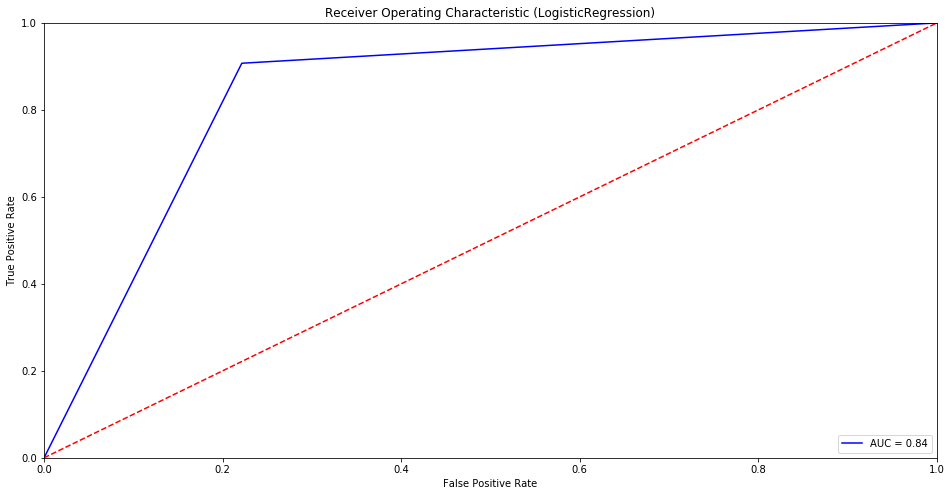

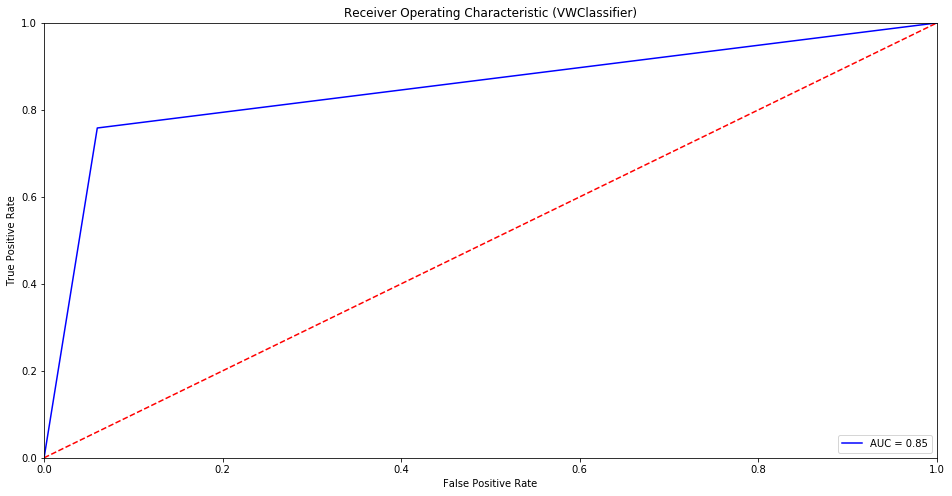

In [59]:
#calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(df_test['SalaryNormalized'], predict_tfidf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (LogisticRegression)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(vw_df_test['SalaryNormalized'], predict_vw_tfidf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (VWClassifier)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

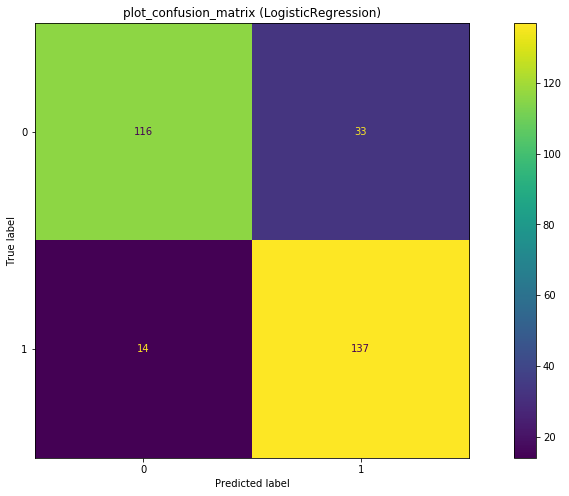

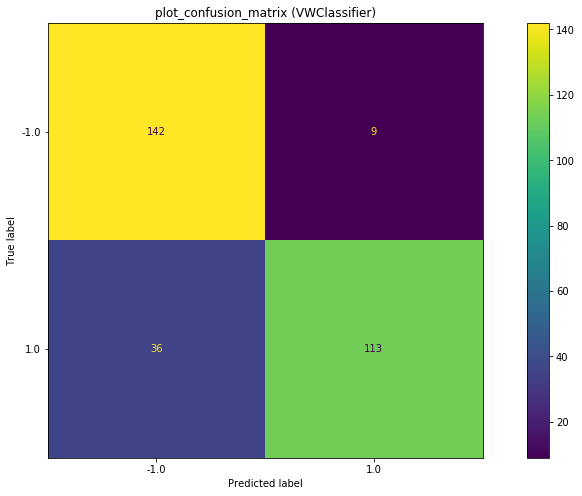

In [60]:
plot_confusion_matrix(logreg_clf_tfidf, vectors_tfidf_test, df_test['SalaryNormalized'], values_format = "d")
plt.title('plot_confusion_matrix (LogisticRegression)')
plt.show()

plot_confusion_matrix(vw_clf_tfidf, vectors_tfidf_test, vw_df_test['SalaryNormalized'], values_format = "d")
plt.title('plot_confusion_matrix (VWClassifier)')
plt.show()

#### 10. (0.5 балла) Сравните значения метрик из п. 9 со значениями, полученными в п. 5, и сравните соответствующие модели по качеству из работы.

**Ответ**:

#### 11. (1 балл) Отсортируйте веса признаков для модели логистической регрессии из scikit-learn, полученной в п. 8. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретирйте полученный результат.

In [61]:
sum_words_tfidf = vectors_tfidf_train.sum(axis=0) 
words_freq_tfidf = [(word, sum_words_tfidf[0, idx]) for word, idx in vectorizer_tfidf.vocabulary_.items()]
words_freq_tfidf = sorted(words_freq_tfidf, key = lambda x: x[1], reverse=True)

In [62]:
#most
print(words_freq_tfidf[:10])

[('and', 87.23147392325446), ('the', 71.1668413328143), ('to', 70.01806693549251), ('care', 48.05295630319498), ('of', 47.470564467367545), ('in', 45.177322972503454), ('home', 39.345159940144), ('for', 38.80243563414884), ('you', 33.53694294051986), ('manager', 31.482523807846484)]


In [63]:
#less
print(words_freq_tfidf[-10:])

[('innovations', 0.028593458790148546), ('cardiothoracic', 0.028593458790148546), ('valuables', 0.028593458790148546), ('recognising', 0.028593458790148546), ('ttm', 0.028593458790148546), ('reflection', 0.028593458790148546), ('origin', 0.028593458790148546), ('ryan', 0.028593458790148546), ('nationality', 0.028593458790148546), ('directorate', 0.028593458790148546)]


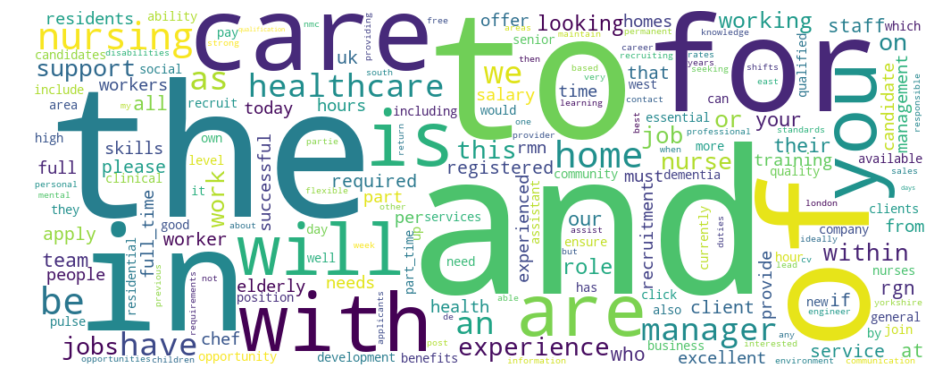

In [64]:
words_freq_tfidf_dict = dict([(word, sum_words_tfidf[0, idx]) for word, idx in vectorizer_tfidf.vocabulary_.items()])
wordcloud_tfidf = WordCloud(width=1000, height=400, background_color='white').generate_from_frequencies(words_freq_tfidf_dict)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

#### 12. (0.5 доп. балла) Отсортируйте веса признаков для модели логистической регрессии, полученной в п. 8 при помощи Vowpal Wabbit. Какие слова из встречающихся в выборке имеют наибольшее/наименьшее влияние на значение целевой переменной? Проинтерпретирйте полученный результат.

In [65]:
# Your code here

## Счётчики

Ранее в рамках данного задания при построении моделей мы объединяли значения всех признаков в единую строку, что предполагает равноправность всех признаков. Однако заметим, что в этом случае мы допускаем потерю информации: слово "Glasgow" может по-разному влиять на зарплату, если оно находится в названии объявления и в геолокации. Чтобы устранить этот недостаток, при создании текстового описания объекта будем объединять только значения признаков Title и FullDescription, а остальные будем рассматривать как категориальные. При этом с полученным текстовым описанием объекта будем работать, как раньше (при помощи векторизации или tf-idf), а для кодирования категориальных признаков используем **счётчики**.

Идея этого метода состоит в том, чтобы заменить значение категориального признака на вероятность того, что объект с данным значением признака относится к положительному классу. Опишем эту идею более формально. Пусть у нас есть выборка $X = \{ (x_i, y_i) \}_{i=1}^l,$ и $j$-ый признак принимает значения из множества $U_j = \{ u_{jn}\}_{n=1}^{N_j},$ где $N_j$ — количество различных значений $j$-ого признака. Пусть $x_{ij} = u_{jn},$ тогда заменим значения $j$-ого категориального признака объекта $x_i$ на следующую оценку: 
$$\hat{P}(y_i=+1|x_{ij}=u_{jn}) = \frac{\sum_{m=1}^l \left[ x_{mj} = u_{jn} \right] \left[ y_m = +1 \right]}{\sum_{m=1}^l \left[ x_{mj} = u_{jn} \right]}.$$

Однако заметим, что при таком способе формирования счётчиков мы учитываем в формуле для объекта $x_i$ его метку $y_i$, тем самым вносим информацию об ответе в признаки. Чтобы устранить этот недостаток, при вычислении счётчика будем исключать из рассмотрения текущий объект, т.е. рассматривать следующую оценку:
$$\hat{P}(y_i=+1|X_{ij}=u_{jn}) = \frac{\sum_{m=1, \\ m \ne i}^l \left[ x_{mj} = u_{jn} \right] \left[ y_m = +1 \right]}{\sum_{m=1, \\ m \ne i}^l \left[ x_{mj} = u_{jn} \right]},$$

#### 13. (0.5 балла) Создайте текстовое описание объектов обучающей и контрольной выборок, объединив значения признаков Title и FullDescription каждого объекта выборки через символ пробела, после чего перейдите к признаковому описанию объектов, вычислив вектор tf-idf аналогично п. 7.

In [66]:
df['string_concat_2'] = df['Title'].str.cat(df['FullDescription'], sep =" ", na_rep = "")

In [71]:
df.head(5)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,SourceName,string_concat,string_concat_2
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk,Engineering Systems Analyst Engineering System...,Engineering Systems Analyst Engineering System...
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk,Stress Engineer Glasgow Stress Engineer Glasgo...,Stress Engineer Glasgow Stress Engineer Glasgo...
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk,Modelling and simulation analyst Mathematical ...,Modelling and simulation analyst Mathematical ...
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,1,cv-library.co.uk,"Pioneer, Miser Engineering Systems Analyst Pio...","Pioneer, Miser Engineering Systems Analyst Pio..."


In [72]:
df_train_2, df_test_2 = train_test_split(df, random_state = 42, train_size = .7)
print(df_train_2.shape)
print(df_test_2.shape)

(700, 13)
(300, 13)


In [73]:
vectorizer_2_tfidf = TfidfVectorizer(analyzer='word')

#training vectors
vectors_2_tfidf_train = vectorizer_2_tfidf.fit_transform(df_train_2['string_concat_2'])

In [74]:
print(vectors_2_tfidf_train.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.14899699 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [228]:
vector = vectorizer_2_tfidf.transform(['Business Development Executive  ****k plus bonus Business Development Executive'])

In [229]:
print(vector.toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [226]:
print(len(vector.toarray()[0]))

5712


In [78]:
print(np.sum(vector.toarray()[0]))

2.054879684229274


In [79]:
print(vectorizer_2_tfidf.inverse_transform(vector.toarray()[0]))

[array(['bonus', 'business', 'development', 'executive', 'plus'],
      dtype='<U58')]


In [80]:
#test vectors
vectors_2_tfidf_test = vectorizer_2_tfidf.transform(df_test_2['string_concat'])

In [81]:
print(vectors_2_tfidf_test.shape)

(300, 5712)


#### 14. (1 балл) Закодируйте категориальные признаки (все, кроме Title и FullDescription) при помощи [one-hot encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), после чего обучите логистическую регрессию (при помощи scikit-learn или Vowpal Wabbit) на обучающей выборке. Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для полученной модели на контрольной выборке. 

In [174]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

In [175]:
df_2_cat = df.drop(["Id", "Title", "FullDescription", "LocationRaw", "SalaryNormalized", "SourceName", "string_concat", "string_concat_2"], axis=1)
df_2_cat = df_2_cat.fillna(value = "")

df_train_2_cat = df_train_2.drop(["Id", "Title", "FullDescription", "LocationRaw", "SalaryNormalized", "SourceName", "string_concat", "string_concat_2"], axis=1)
df_train_2_cat = df_train_2_cat.fillna(value = "")

df_test_2_cat = df_test_2.drop(["Id", "Title", "FullDescription", "LocationRaw", "SalaryNormalized", "SourceName", "string_concat", "string_concat_2"], axis=1)
df_test_2_cat = df_test_2_cat.fillna(value = "")

In [187]:
df_2_cat.head(5)

,LocationNormalized,ContractType,ContractTime,Company,Category
0,Dorking,,permanent,Gregory Martin International,Engineering Jobs
1,Glasgow,,permanent,Gregory Martin International,Engineering Jobs
2,Hampshire,,permanent,Gregory Martin International,Engineering Jobs
3,Surrey,,permanent,Gregory Martin International,Engineering Jobs
4,Surrey,,permanent,Gregory Martin International,Engineering Jobs


In [154]:
df_train_2_cat.head(5)

,LocationNormalized,ContractType,ContractTime,Company,Category
541,York,full_time,,,Healthcare & Nursing Jobs
440,Marlow,part_time,,,Healthcare & Nursing Jobs
482,St. Fagans,full_time,,,Healthcare & Nursing Jobs
422,Maidstone,part_time,,,Healthcare & Nursing Jobs
778,Ashford,full_time,,,Healthcare & Nursing Jobs


In [155]:
df_test_2_cat.head(5)

,LocationNormalized,ContractType,ContractTime,Company,Category
521,Wigan,,,,Healthcare & Nursing Jobs
737,Oxford,full_time,,,Healthcare & Nursing Jobs
740,Northampton,full_time,,,Healthcare & Nursing Jobs
660,Edgbaston,part_time,,,Healthcare & Nursing Jobs
411,UK,part_time,,,Healthcare & Nursing Jobs


In [176]:
enc.fit(df_2_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [193]:
cat_2_train = enc.transform(df_train_2_cat)

In [194]:
cat_2_train

<700x397 sparse matrix of type '<class 'numpy.float64'>'
	with 3500 stored elements in Compressed Sparse Row format>

In [195]:
cat_2_train.shape

(700, 397)

In [180]:
#enc.categories_

In [181]:
df_test_2_cat[:2].head(5)

,LocationNormalized,ContractType,ContractTime,Company,Category
521,Wigan,,,,Healthcare & Nursing Jobs
737,Oxford,full_time,,,Healthcare & Nursing Jobs


In [182]:
cat = enc.transform(df_test_2_cat[:1])

In [183]:
cat.toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [184]:
enc.inverse_transform(cat)

array([['Wigan', '', '', '', 'Healthcare & Nursing Jobs']], dtype=object)

In [198]:
#test vectors
cat_2_test = enc.transform(df_test_2_cat)

In [199]:
cat_2_test.shape

(300, 397)

In [200]:
cat_2_test

<300x397 sparse matrix of type '<class 'numpy.float64'>'
	with 1500 stored elements in Compressed Sparse Row format>

In [201]:
logreg_clf_cat = LogisticRegression(max_iter=1000000)

#training
logreg_clf_cat.fit(cat_2_train, df_train['SalaryNormalized'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
#predict
predict_cat = logreg_clf_cat.predict(cat_2_test)

In [203]:
print(metrics.confusion_matrix(predict_cat, df_test['SalaryNormalized']))

[[ 89  11]
 [ 60 140]]


In [204]:
print(metrics.classification_report(predict_cat, df_test['SalaryNormalized']))

              precision    recall  f1-score   support

           0       0.60      0.89      0.71       100
           1       0.93      0.70      0.80       200

    accuracy                           0.76       300
   macro avg       0.76      0.79      0.76       300
weighted avg       0.82      0.76      0.77       300



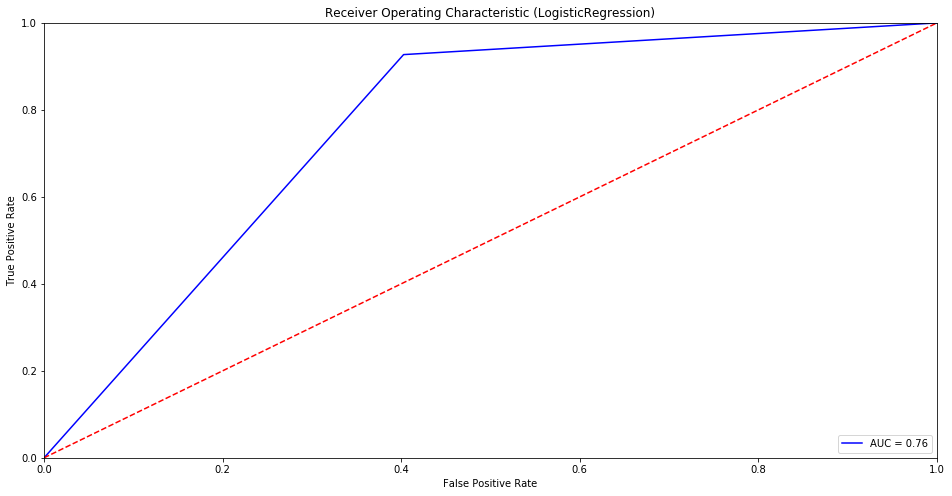

In [205]:
#calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(df_test['SalaryNormalized'], predict_cat)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (LogisticRegression)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

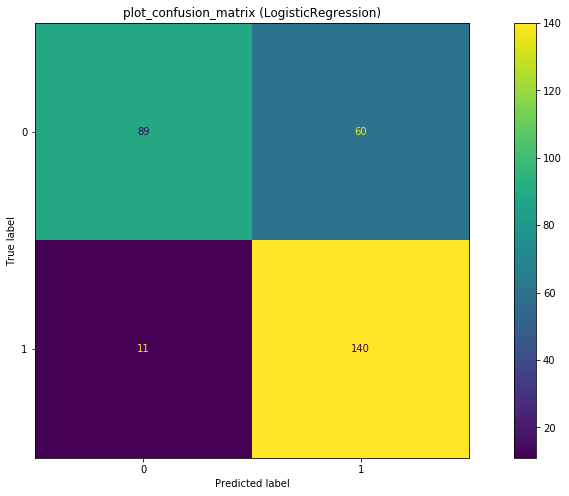

In [206]:
plot_confusion_matrix(logreg_clf_cat, cat_2_test, df_test['SalaryNormalized'], values_format = "d")
plt.title('plot_confusion_matrix (LogisticRegression)')
plt.show()

#### 15. (2 балла) Для выборки, полученной в п. 13, закодируйте категориальные признаки (все, кроме Title и FullDescription) при помощи счётчиков, после чего обучите логистическую регрессию (при помощи scikit-learn или Vowpal Wabbit) на обучающей выборке. Вычислите значения ROC-AUC, [F-меры](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html), а также постройте [матрицу ошибок](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) для полученной модели на контрольной выборке. 

Уделите внимание оптимальности вычисления счётчиков!

In [208]:
df_train_2.head(5)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,SourceName,string_concat,string_concat_2
541,46629217,Care Home Manager North Yorkshire,Care Home Manager / Commissioning Manager Nort...,"York, North Yorkshire",York,full_time,NaN,NaN,Healthcare & Nursing Jobs,1,careworx.co.uk,Care Home Manager North Yorkshire Care Home Ma...,Care Home Manager North Yorkshire Care Home Ma...
440,46628408,Home Care Worker Jobs Marlow,Red Kite Home Care are currently seeking home ...,"Marlow, Buckinghamshire",Marlow,part_time,NaN,NaN,Healthcare & Nursing Jobs,0,careworx.co.uk,Home Care Worker Jobs Marlow Red Kite Home Car...,Home Care Worker Jobs Marlow Red Kite Home Car...
482,46628769,Care Assistant Cardiff,The Court Nursing Home is a 60 bedded Home in ...,"St Fagans Cardiff, Cardiff",St. Fagans,full_time,NaN,NaN,Healthcare & Nursing Jobs,0,careworx.co.uk,Care Assistant Cardiff The Court Nursing Home ...,Care Assistant Cardiff The Court Nursing Home ...
422,46628215,Psychological Wellbeing Practitioner Kent,Pulse are currently looking to recruit a small...,"Maidstone, Kent",Maidstone,part_time,NaN,NaN,Healthcare & Nursing Jobs,1,careworx.co.uk,Psychological Wellbeing Practitioner Kent Puls...,Psychological Wellbeing Practitioner Kent Puls...
778,46632812,Night Nurse Kent,Night RGN Staff Nurses or Night RMN Staff Nurs...,"Ashford, Kent",Ashford,full_time,NaN,NaN,Healthcare & Nursing Jobs,0,careworx.co.uk,Night Nurse Kent Night RGN Staff Nurses or Nig...,Night Nurse Kent Night RGN Staff Nurses or Nig...


In [233]:
df_train_2.insert(2, "str_vec", vectors_2_tfidf_train, True)

In [235]:
df_train_2.insert(2, "cat_vec", cat_2_train, True)

In [237]:
df_train_2_cut = df_train_2.copy()

In [240]:
df_train_2_cut.drop(["Id", "Title", "FullDescription", "LocationRaw", "LocationNormalized", "ContractType", "ContractTime", "Company", "Category", "SalaryNormalized", "SourceName", "string_concat", "string_concat_2"], 1, inplace=True)

In [241]:
df_train_2_cut.head(5)

,cat_vec,str_vec
541,"(0, 344)\t1.0\n (0, 346)\t1.0\n (0, 348)\t...","(0, 3102)\t0.0999515933010013\n (0, 3089)\t..."
440,"(0, 344)\t1.0\n (0, 346)\t1.0\n (0, 348)\t...","(0, 3102)\t0.0999515933010013\n (0, 3089)\t..."
482,"(0, 344)\t1.0\n (0, 346)\t1.0\n (0, 348)\t...","(0, 3102)\t0.0999515933010013\n (0, 3089)\t..."
422,"(0, 344)\t1.0\n (0, 346)\t1.0\n (0, 348)\t...","(0, 3102)\t0.0999515933010013\n (0, 3089)\t..."
778,"(0, 344)\t1.0\n (0, 346)\t1.0\n (0, 348)\t...","(0, 3102)\t0.0999515933010013\n (0, 3089)\t..."


In [247]:
df_test_2.insert(2, "str_vec", vectors_2_tfidf_test, True)
df_test_2.insert(2, "cat_vec", cat_2_test, True)
df_test_2_cut = df_test_2.copy()
df_test_2_cut.drop(["Id", "Title", "FullDescription", "LocationRaw", "LocationNormalized", "ContractType", "ContractTime", "Company", "Category", "SalaryNormalized", "SourceName", "string_concat", "string_concat_2"], 1, inplace=True)

In [248]:
df_test_2_cut.head(5)

,cat_vec,str_vec
521,"(0, 331)\t1.0\n (0, 345)\t1.0\n (0, 348)\t...","(0, 5705)\t0.029011084356386167\n (0, 5702)..."
737,"(0, 331)\t1.0\n (0, 345)\t1.0\n (0, 348)\t...","(0, 5705)\t0.029011084356386167\n (0, 5702)..."
740,"(0, 331)\t1.0\n (0, 345)\t1.0\n (0, 348)\t...","(0, 5705)\t0.029011084356386167\n (0, 5702)..."
660,"(0, 331)\t1.0\n (0, 345)\t1.0\n (0, 348)\t...","(0, 5705)\t0.029011084356386167\n (0, 5702)..."
411,"(0, 331)\t1.0\n (0, 345)\t1.0\n (0, 348)\t...","(0, 5705)\t0.029011084356386167\n (0, 5702)..."


In [250]:
df_train_2_cut.loc[1, 'cat_vec']

<700x397 sparse matrix of type '<class 'numpy.float64'>'
	with 3500 stored elements in Compressed Sparse Row format>

In [254]:
logreg_clf_both = LogisticRegression(max_iter=1000000)

#training
logreg_clf_both.fit(df_train_2_cut, df_train['SalaryNormalized'])

ValueError: setting an array element with a sequence.

In [ ]:
#predict
predict_both = logreg_clf_both.predict(df_test_2_cut)

#### 16. (0.5 балла) Сравните значения метрик из п. 15 со значениями, полученными в п. 14, и сделайте вывод о качестве классификации для каждого из методов кодирования категориальных признаков.

**Ответ:**

## Подбор гиперпараметров

#### 17. (1.5 доп. балла) Разбейте обучающую выборку, полученную в п. 13, на обучающую и валидационную в отношении 80/20, после чего подберите оптимальное количество фолдов, используемое при кодировании категориальных признаков (всех, кроме Title и FullDescription), путём оптимизации значения accuracy на валидационной выборке. Используйте следующие модели, аналогично также подобрав оптимальные значения указанных гиперпараметров:
- логистическую регрессию из модуля sklearn с подбором коэффициента регуляризации;
- логистическую регрессию при помощи Vowpal Wabbit с подбором следующих гиперпараметров:
    - коэффициент регуляризации (--l2);
    - количество эпох (--passes);
    - длина градиентного шага (-l);
    - длина N-грамм (--ngram).

In [ ]:
# Your code here

#### 18. (0.5 доп. балла) Обучите указанные выше модели на обучающей выборке для оптимальных значений гиперпараметров, найденных в п. 17, после чего для каждой из моделей вычислите значения ROC-AUC, F-меры, а также постройте матрицу ошибок на контрольной выборке. Как качество классификации при помощи полученных в данном разделе моделей соотносится с моделями, полученными в предыдущих разделах?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу вторую любимую смешную картинку.

<img src = "https://panteon.fun/files/-X-wnkwmPFI.jpg">

А здесь — посоветовать преподавателям хороший фильм или сериал.